In [99]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]

import skfuzzy as fuzz

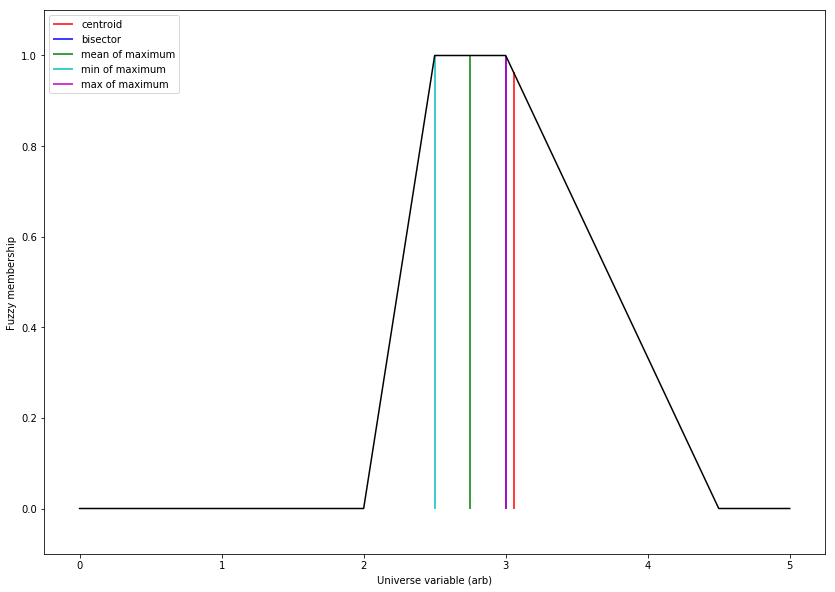

In [100]:
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

In [101]:
data = pd.read_csv('Corruption Perceptions Index - Dataset.csv', sep=';')

data['african_union'] = data['african_union'].astype('bool')
data['arab_states'] = data['arab_states'].astype('bool')
data['BRICS'] = data['BRICS'].astype('bool')
data['EU'] = data['EU'].astype('bool')
data['G20'] = data['G20'].astype('bool')
data['OECD'] = data['OECD'].astype('bool')

data.head()

,country,ISO3,region,african_union,arab_states,BRICS,EU,G20,OECD,CPI_score_2017,...,bertelsmann_foundation_transformation_index,african_development_bank_CPIA,IMD_world_competitiveness_yearbook,bertelsmann_foundation_sustainable_governance_index,world_justice_project_rule_of_law_index,PRS_international_country_risk_guide,varieties_of_democracy_project,economist_intelligence_unit_country_ratings,freedom_house_nations_in_transit_ratings,PERC_asia_risk_guide
0,New Zealand,NZL,AP,False,False,False,False,False,True,89,...,0,0,93,97,82,93,77,90,0,0
1,Denmark,DNK,WE/EU,False,False,False,True,False,True,88,...,0,0,99,97,88,93,77,90,0,0
2,Finland,FIN,WE/EU,False,False,False,True,False,True,85,...,0,0,92,88,86,93,75,72,0,0
3,Norway,NOR,WE/EU,False,False,False,False,False,True,85,...,0,0,85,79,86,93,77,90,0,0
4,Switzerland,CHE,WE/EU,False,False,False,False,False,True,85,...,0,0,89,88,0,85,77,90,0,0


In [102]:
data.columns

Index(['country', 'ISO3', 'region', 'african_union', 'arab_states', 'BRICS',
       'EU', 'G20', 'OECD', 'CPI_score_2017', 'standard_error_2017',
       'lower_CI_2017', 'upper_CI_2017', 'number_sources_2017',
       'CPI_score_2012', 'standard_error_2012', 'number_sources_2012',
       'CPI_score_2013', 'standard_error_2013', 'number_sources_2013',
       'CPI_score_2014', 'standard_error_2014', 'number_sources_2014',
       'CPI_score_2015', 'standard_error_2015', 'number_sources_2015',
       'CPI_score_2016', 'standard_error_2016', 'number_sources_2016',
       'world_bank_CPIA', 'world_economic_forum_EOS',
       'global_insight_country_risk_ratings',
       'bertelsmann_foundation_transformation_index',
       'african_development_bank_CPIA', 'IMD_world_competitiveness_yearbook',
       'bertelsmann_foundation_sustainable_governance_index',
       'world_justice_project_rule_of_law_index',
       'PRS_international_country_risk_guide',
       'varieties_of_democracy_project',
   

In [103]:
data.dtypes

country                                                 object
ISO3                                                    object
region                                                  object
african_union                                             bool
arab_states                                               bool
BRICS                                                     bool
EU                                                        bool
G20                                                       bool
OECD                                                      bool
CPI_score_2017                                           int64
standard_error_2017                                    float64
lower_CI_2017                                            int64
upper_CI_2017                                            int64
number_sources_2017                                      int64
CPI_score_2012                                           int64
standard_error_2012                                    

In [106]:
data_cpi = data[['country', 
                 'CPI_score_2017', 
                 'CPI_score_2016', 
                 'CPI_score_2015',
                 'CPI_score_2014',
                 'CPI_score_2013',
                 'CPI_score_2012']]

data_cpi.columns = ['country', '2017', '2016', '2015', '2014', '2013', '2012']

data_top_2017 = data_cpi.nlargest(20, columns=['2017'])

data_melt = pd.melt(data_top_2017, 
                    id_vars=['country'], 
                    var_name="date", 
                    value_name="CPI_score", 
                    value_vars=['2017', '2016', '2015', '2014', '2013', '2012'])
data_melt.date = pd.to_datetime(data_melt.date)
data_melt = data_melt.set_index(['country', 'date']).sort_index()
data_melt.head()

CPI_score
country   date                 
Australia 2012-01-01         85
          2013-01-01         81
          2014-01-01         80
          2015-01-01         79
          2016-01-01         79

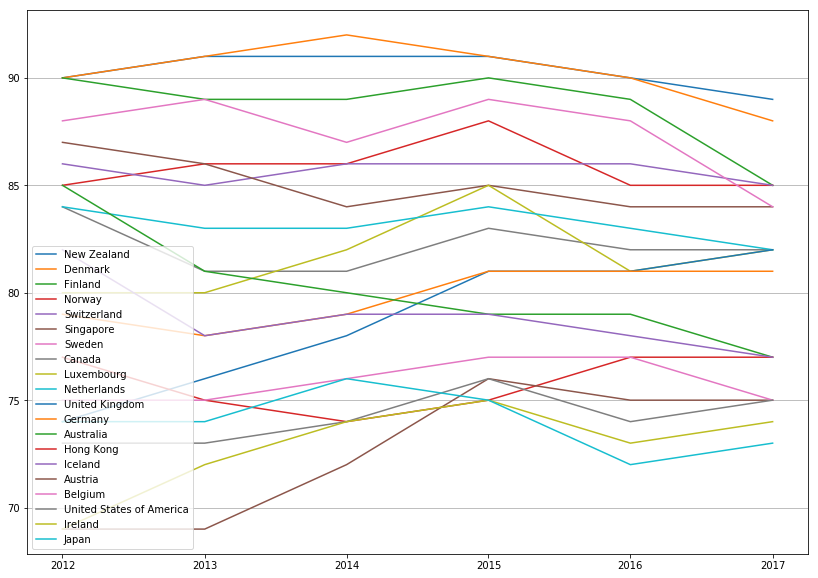

In [107]:
plt.figure()

countries = data_top_2017.country.values

for c in countries:
    d = data_melt.loc[c]
    plt.plot(d.index, d.values)

plt.legend(countries, loc='best')
plt.grid(axis='y')